<a href="https://colab.research.google.com/github/yehezkielgunawan/uas-business-intelligence/blob/main/UAS_Business_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_excel('/content/gdrive/My Drive/UAS Business Intelligence/bank-additional-full.xlsx')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


In [3]:
df.head(2).to_json()

'{"age":{"0":56,"1":57},"job":{"0":"housemaid","1":"services"},"marital":{"0":"married","1":"married"},"education":{"0":"basic.4y","1":"high.school"},"default":{"0":"no","1":"unknown"},"housing":{"0":"no","1":"no"},"loan":{"0":"no","1":"no"},"contact":{"0":"telephone","1":"telephone"},"month":{"0":"may","1":"may"},"day_of_week":{"0":"mon","1":"mon"},"duration":{"0":261,"1":149},"campaign":{"0":1,"1":1},"pdays":{"0":999,"1":999},"previous":{"0":0,"1":0},"poutcome":{"0":"nonexistent","1":"nonexistent"},"emp.var.rate":{"0":1.1,"1":1.1},"cons.price.idx":{"0":93994.0,"1":93994.0},"cons.conf.idx":{"0":-36.4,"1":-36.4},"euribor3m":{"0":4857.0,"1":4857.0},"nr.employed":{"0":5191.0,"1":5191.0},"y":{"0":"no","1":"no"}}'

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['y'])
y = df['y']

# Encode target variable
y = y.map({'no': 0, 'yes': 1})

# One-hot encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Normalize numerical variables
scaler = StandardScaler()
X_encoded[:, :-1] = scaler.fit_transform(X_encoded[:, :-1])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc, title):
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

Confusion Matrix (Logistic Regression):
[[7108  195]
 [ 541  394]]


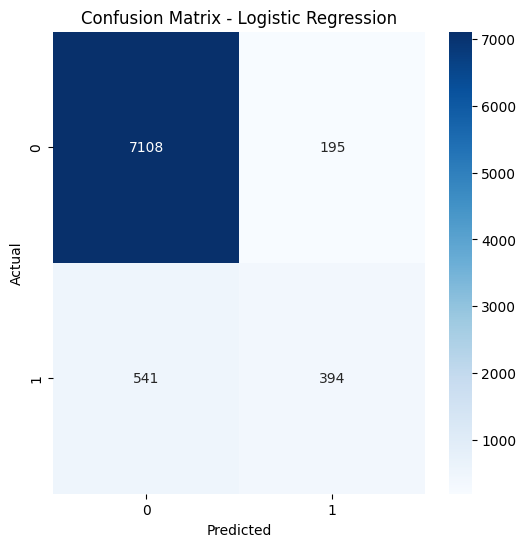

AUC (Logistic Regression): 0.697344509362133


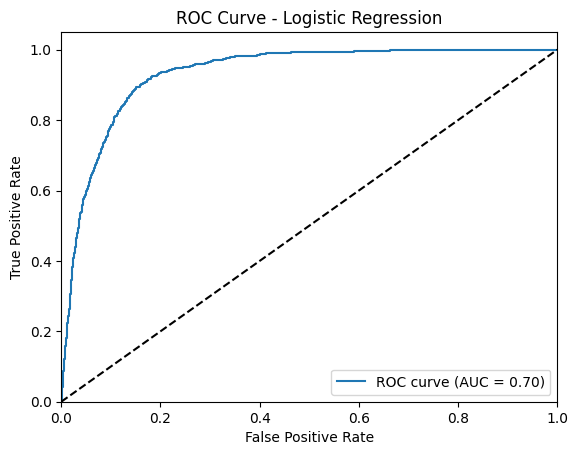

In [7]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
logreg_predictions = logreg.predict(X_test)

# Compute confusion matrix
logreg_cm = confusion_matrix(y_test, logreg_predictions)
print("Confusion Matrix (Logistic Regression):")
print(logreg_cm)

plot_confusion_matrix(logreg_cm, "Confusion Matrix - Logistic Regression")

# Calculate AUC
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
logreg_auc = roc_auc_score(y_test, logreg_predictions)
print("AUC (Logistic Regression):", logreg_auc)
plot_roc_curve(logreg_fpr, logreg_tpr, logreg_auc, "ROC Curve - Logistic Regression")

Confusion Matrix (Decision Tree):
[[6806  497]
 [ 420  515]]


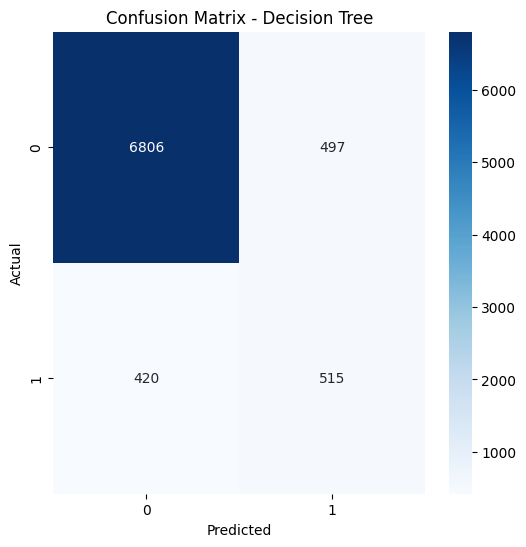

AUC (Decision Tree): 0.7413739573730231


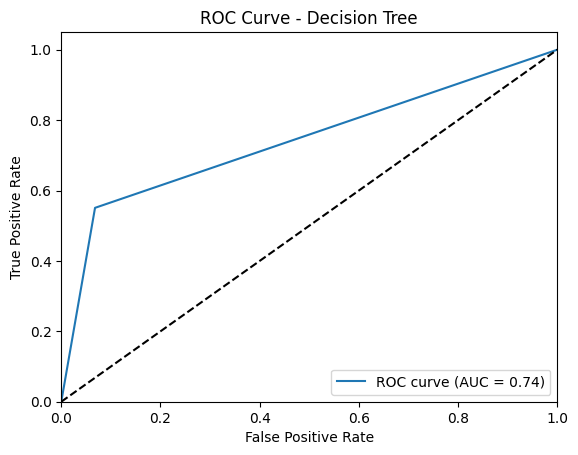

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt.predict(X_test)

# Compute confusion matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
print("Confusion Matrix (Decision Tree):")
print(dt_cm)

plot_confusion_matrix(dt_cm, "Confusion Matrix - Decision Tree")

# Calculate AUC
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
dt_auc = roc_auc_score(y_test, dt_predictions)
print("AUC (Decision Tree):", dt_auc)
plot_roc_curve(dt_fpr, dt_tpr, dt_auc, "ROC Curve - Decision Tree")

Confusion Matrix (Random Forest):
[[7091  212]
 [ 518  417]]


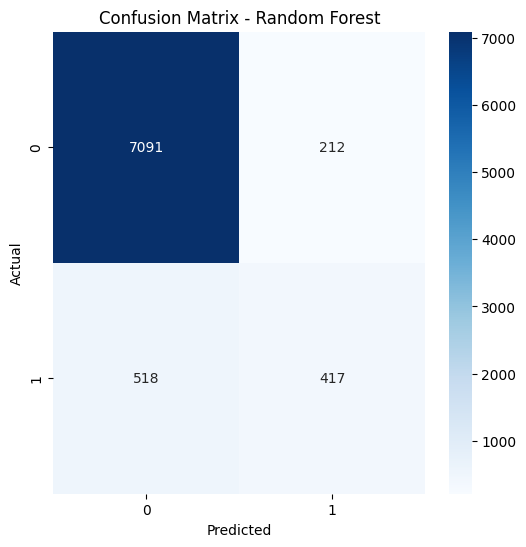

AUC (Random Forest): 0.7084800693583548


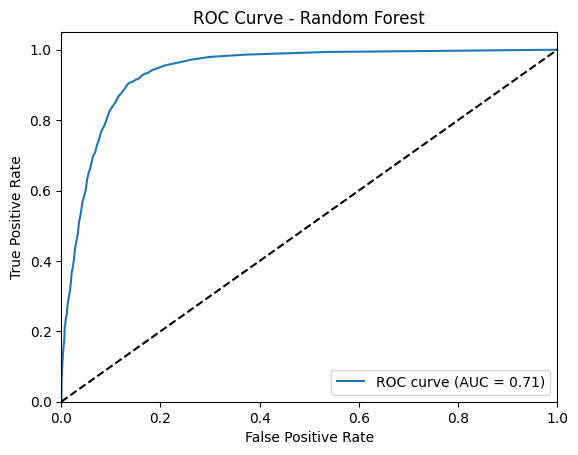

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf.predict(X_test)

# Compute confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix (Random Forest):")
print(rf_cm)

plot_confusion_matrix(rf_cm, "Confusion Matrix - Random Forest")

# Calculate AUC
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf_predictions)
print("AUC (Random Forest):", rf_auc)
plot_roc_curve(rf_fpr, rf_tpr, rf_auc, "ROC Curve - Random Forest")

Confusion Matrix (SVM):
[[7303    0]
 [ 935    0]]


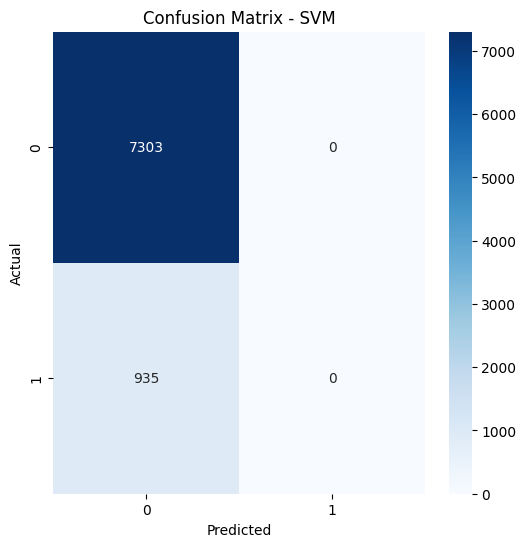

AUC (SVM): 0.5


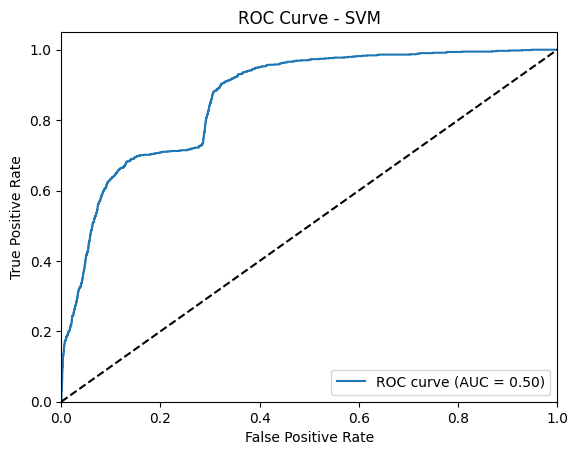

In [10]:
from sklearn.svm import SVC

# Create and train the model
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm.predict(X_test)

# Compute confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix (SVM):")
print(svm_cm)

plot_confusion_matrix(svm_cm, "Confusion Matrix - SVM")

# Calculate AUC
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm.decision_function(X_test))
svm_auc = roc_auc_score(y_test, svm_predictions)
print("AUC (SVM):", svm_auc)
plot_roc_curve(svm_fpr, svm_tpr, svm_auc, "ROC Curve - SVM")

Confusion Matrix (KNN):
[[7054  249]
 [ 626  309]]


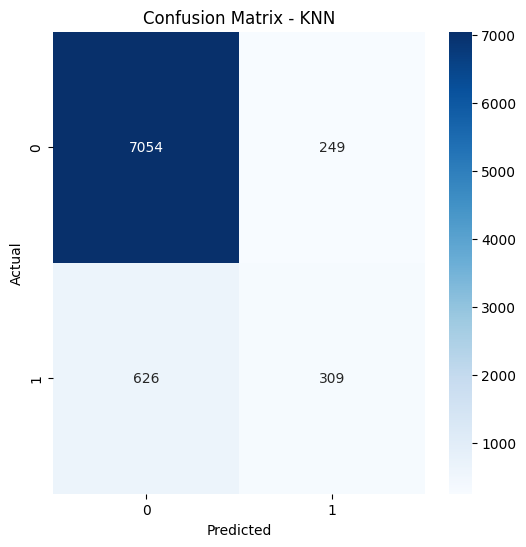

AUC (KNN): 0.6481928531311945


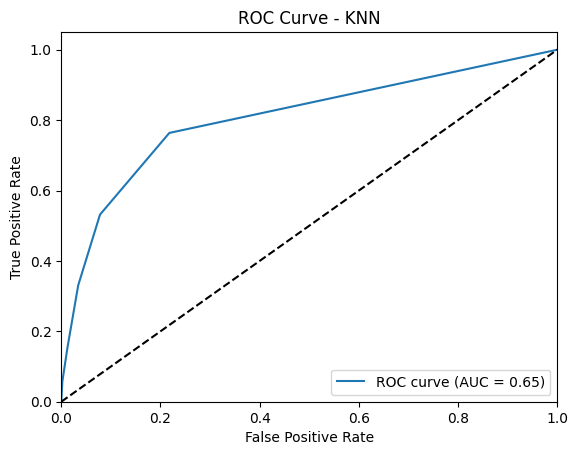

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn.predict(X_test)

# Compute confusion matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix (KNN):")
print(knn_cm)

plot_confusion_matrix(knn_cm, "Confusion Matrix - KNN")

# Calculate AUC
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
knn_auc = roc_auc_score(y_test, knn_predictions)
print("AUC (KNN):", knn_auc)
plot_roc_curve(knn_fpr, knn_tpr, knn_auc, "ROC Curve - KNN")